# Análisis de tamaño de tienda

In [602]:
#Librerias utilizadas para este análisis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score 

%matplotlib inline

In [603]:
df=pd.read_excel(r"",encoding='latin1') #Carga del archivo excel con los datos generales

In [1]:
df #Vemos que traen los datos

In [2]:
df.columns #Observamos los nombres de columnas

In [606]:
#df2=df[['Etiquetas de fila', 'Cuenta de cve', 'Cuenta de ID_Cte',
#       'Promedio de refri_torre', 'Promedio de refri_vit',
#       'Promedio de vitrina', 'Promedio de pared', 'Promedio de pasillo']]

#Escogemos solo las columnas que nos son útiles
df2=df[[]]

#Importamos las sigueintes librerias para la transformación de datos

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scaler = MinMaxScaler()
print(scaler.fit(df2))

#Transformamos los datos. La transformación aplicada es Min-Max scaler
new=pd.DataFrame(scaler.transform(df2))
#new=pd.DataFrame(preprocessing.scale(df2))
new.columns=df2.columns

MinMaxScaler(copy=True, feature_range=(0, 1))


In [3]:
new #Vemos como quedo el dataset

In [ ]:
X=new[[i for i in new.columns if i not in []]]
for i in range(2,17):
    model_aux=AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    model_aux.fit(X)
    labelsaux = model_aux.labels_
    print(i," ",silhouette_score(X, labelsaux, metric='euclidean', sample_size=None, random_state=None))

for i in range(2,17):
    model_aux=KMeans(n_clusters=3).fit_predict(X)
    print(i," ",silhouette_score(X, model_aux, metric='euclidean', sample_size=None, random_state=None))

In [579]:
#importamos un algoritmo de clusterización. En este proceso aplicamos dos algoritmos uno detras del otro.

X=new[[i for i in new.columns if i not in []]]
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') #Primer algoritmo
model.fit(X)
labels = model.labels_ 
new["Label"]=labels 
X["Label"]=labels #Agregamos las primeras etiquetas


kmeans=KMeans(n_clusters=3).fit_predict(X) #Segundo algoritmo
new["Labelk"]=kmeans #Etiquetas finales



In [580]:
#Agregamos las etiquetas al dataset principal final
df["label"]=new["Label"]
df["labelk"]=new["Labelk"] 

In [581]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

#Agrupamos por etiqueta y score para observar su relación.
df.groupby(["labelk","Score"]).describe().reset_index()["cve"]["count"]
aux=df.groupby(["labelk","Score"]).describe().reset_index()[["labelk","Score"]]
aux["cve_count"]=df.groupby(["labelk","Score"]).describe().reset_index()["cve"]["count"]

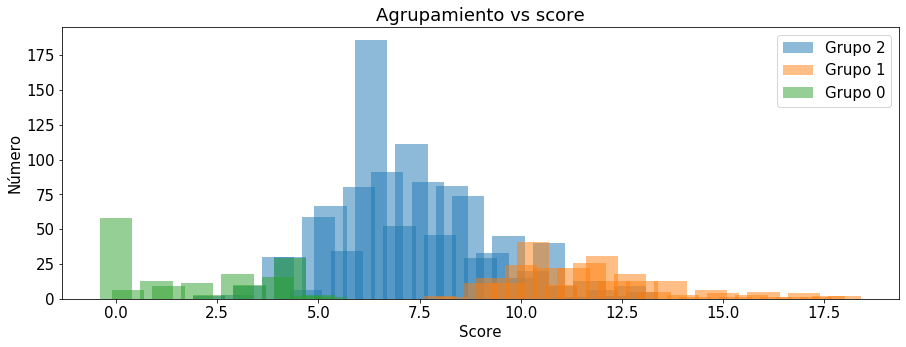

In [582]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,5))
#Graficamos el cluster vs el score para ver como se repartieron los datos
plt.bar(aux[aux["labelk"]==0]["Score"],aux[aux["labelk"]==0]["cve_count"],alpha=0.5,label="Grupo 2")
plt.bar(aux[aux["labelk"]==1]["Score"],aux[aux["labelk"]==1]["cve_count"],alpha=0.5,label="Grupo 1")
plt.bar(aux[aux["labelk"]==2]["Score"],aux[aux["labelk"]==2]["cve_count"],alpha=0.5,label="Grupo 0")
#plt.bar(df[df["label"]==3]["Etiquetas de fila"],df[df["label"]==3]["Cuenta de cve"],alpha=0.8,label="Grupo 4")

plt.ylabel("Número")
plt.xlabel("Score")
plt.legend(loc='best')
plt.title("Agrupamiento vs score")
plt.legend()
plt.savefig(r"",bbox_inches='tight') # save as png
plt.show()